In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv, glob, os

In [2]:
problem_name = 'benchmark'
report_directory = '../report_L_test'

In [3]:
files = glob.glob(os.path.join(report_directory, 'VARL_*_steps_9_' + problem_name + '_L_test_LSCHEME/060_' + problem_name +'*.csv'), recursive=True)

In [4]:
sorted_files = {}
sorted_iterations = {}

In [5]:
for file in files:
    L_value = int(file[file[:file.find('_steps_')].rfind('_')+1 : file.find('_steps_')]) * 1e-3
    print(file, str(L_value))

    sorted_files[L_value] = file

sorted_files = dict(sorted(sorted_files.items()))

../report_L_test/VARL_47_steps_9_benchmark_L_test_LSCHEME/060_benchmark_L_test_LSCHEME_richards_solver.csv 0.047
../report_L_test/VARN_33_steps_9_benchmark_L_test_LSCHEME/060_benchmark_L_test_LSCHEME_richards_solver.csv 0.033
../report_L_test/VARL_55_steps_9_benchmark_L_test_LSCHEME/060_benchmark_L_test_LSCHEME_richards_solver.csv 0.055
../report_L_test/VARL_63_steps_9_benchmark_L_test_LSCHEME/060_benchmark_L_test_LSCHEME_richards_solver.csv 0.063
../report_L_test/VARL_07_steps_9_benchmark_L_test_LSCHEME/060_benchmark_L_test_LSCHEME_richards_solver.csv 0.007
../report_L_test/VARL_25_steps_9_benchmark_L_test_LSCHEME/060_benchmark_L_test_LSCHEME_richards_solver.csv 0.025
../report_L_test/VARL_71_steps_9_benchmark_L_test_LSCHEME/060_benchmark_L_test_LSCHEME_richards_solver.csv 0.07100000000000001
../report_L_test/VARL_31_steps_9_benchmark_L_test_LSCHEME/060_benchmark_L_test_LSCHEME_richards_solver.csv 0.031
../report_L_test/VARL_33_steps_9_benchmark_L_test_LSCHEME/060_benchmark_L_test_LSC

In [6]:
for L_value in sorted_files:

    with open(sorted_files[L_value], 'r') as csvfile:
        lines = csv.reader(csvfile, delimiter=',')
        sorted_iterations[L_value] = (sum(1 for row in lines))

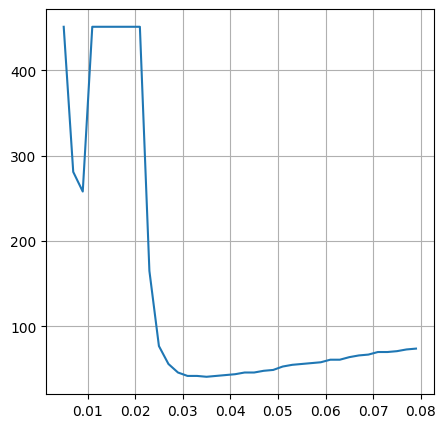

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ax.plot( list(sorted_iterations.keys())[2:], [sorted_iterations[ll] for ll in list(sorted_iterations.keys())[2:]] )

ax.grid()